In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
params={'format':'csv'}

In [3]:
response=requests.get('https://covidtracking.com/api/v1/states/daily.csv')

In [4]:
with open('covid19_historic_all_states.csv','w') as f:
    f.write(response.text)
f.close()

In [5]:
df=pd.read_csv('covid19_historic_all_states.csv')

In [6]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200630,AK,940.0,111245.0,NaN,18.0,NaN,NaN,NaN,1.0,...,112185,0,0,c5005ccb9df1aac9b5921115fc05931c3b67d41c,0,0,0,0,0,NaN
1,20200630,AL,38045.0,368607.0,NaN,776.0,2769.0,NaN,806.0,NaN,...,406652,21,44,fdfdc3408c4025a5fe62edd82fc96917bbff72c9,0,0,0,0,0,NaN
2,20200630,AR,20777.0,290426.0,NaN,290.0,1413.0,NaN,NaN,67.0,...,311203,5,33,17dcc91281212bb7a3d374b7c5b915d4e9a8f735,0,0,0,0,0,NaN
3,20200630,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,696,0,0,ca74b9993eb587311a979759637d4cce59f795cd,0,0,0,0,0,NaN
4,20200630,AZ,79215.0,453141.0,NaN,2793.0,4736.0,683.0,NaN,455.0,...,532356,44,102,8e7e73ea3a05cb30e8b0193f3444b6ba833eadc4,0,0,0,0,0,NaN


In [7]:
df.columns.values

array(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'dataQualityGrade',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death',
       'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'fips', 'positiveIncrease', 'negativeIncrease', 'total',
       'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'], dtype=object)

In [8]:
df[['date','state','positive','negative','recovered','dateModified','checkTimeEt','death','dateChecked','total','totalTestResults','totalTestResultsIncrease','posNeg','deathIncrease']].head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease
0,20200630,AK,940.0,111245.0,526.0,2020-06-29T00:00:00Z,06/28 20:00,14.0,2020-06-29T00:00:00Z,112185,112185,3476,112185,0
1,20200630,AL,38045.0,368607.0,18866.0,2020-06-30T11:00:00Z,06/30 07:00,950.0,2020-06-30T11:00:00Z,406652,406652,13359,406652,21
2,20200630,AR,20777.0,290426.0,14531.0,2020-06-30T15:16:00Z,06/30 11:16,270.0,2020-06-30T15:16:00Z,311203,311203,8667,311203,5
3,20200630,AS,0.0,696.0,NaN,2020-06-27T00:00:00Z,06/26 20:00,0.0,2020-06-27T00:00:00Z,696,696,0,696,0
4,20200630,AZ,79215.0,453141.0,9411.0,2020-06-30T00:00:00Z,06/29 20:00,1632.0,2020-06-30T00:00:00Z,532356,532356,20933,532356,44


In [9]:
df_covid19=df[['date','state','positive','negative','recovered','dateModified','checkTimeEt','death','dateChecked','total','totalTestResults','totalTestResultsIncrease']].copy(deep=True)

In [10]:
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease
0,20200630,AK,940.0,111245.0,526.0,2020-06-29T00:00:00Z,06/28 20:00,14.0,2020-06-29T00:00:00Z,112185,112185,3476
1,20200630,AL,38045.0,368607.0,18866.0,2020-06-30T11:00:00Z,06/30 07:00,950.0,2020-06-30T11:00:00Z,406652,406652,13359
2,20200630,AR,20777.0,290426.0,14531.0,2020-06-30T15:16:00Z,06/30 11:16,270.0,2020-06-30T15:16:00Z,311203,311203,8667
3,20200630,AS,0.0,696.0,NaN,2020-06-27T00:00:00Z,06/26 20:00,0.0,2020-06-27T00:00:00Z,696,696,0
4,20200630,AZ,79215.0,453141.0,9411.0,2020-06-30T00:00:00Z,06/29 20:00,1632.0,2020-06-30T00:00:00Z,532356,532356,20933


In [11]:
df_covid19['Total - TotalTestResults']=df_covid19['total']-df_covid19['totalTestResults']

In [12]:
df_covid19['Total - TotalTestResults'].unique()

array([    0,  1904,   355,     4,   169,  1744,   261,    31,   158,
        1726,   295,   146,  1731,   284,   140,  1752,    12,   142,
        1675,   303,    21,   134,  1535,   319,    35,   160,  1425,
         291,    33,  1546,   298,    15,  1625,   297,     9,   153,
        1630,    20,   155,  1578,   285,    11,  1457,   259,    13,
         174,  1240,   313,   179,  1150,   257,     5,   192,  1167,
         188,  1184,   302,     2,   184,  1241,   283,     7,   167,
        1242,   363,     6,   172,   358,    28,  1134,   407,   190,
        1100,   383,  1024,   373,     3,   206,  1161,   385,   183,
        1265,   350,   177,  1193,   374,     8,  1221,  1643,   412,
         196,  1191,   435,   199,  1206,  2183,   450,   209,  1160,
        1661,   419,   211,  1332,  1208,   500,    19,   960,   481,
         208,  1308,   891,   525,   235,  1158,   476,    22,   250,
         955,  1370,   444,   335,   901,    18,   218,   988,  1714,
         414,    45,

In [13]:
df_covid19.sort_values(by=['state','date'],ascending=True,inplace=True)
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
6446,20200306,AK,0.0,8.0,NaN,NaN,NaN,0.0,NaN,9,8,0,1
6396,20200307,AK,0.0,12.0,NaN,NaN,NaN,0.0,NaN,14,12,4,2
6346,20200308,AK,0.0,14.0,NaN,NaN,NaN,0.0,NaN,20,14,2,6
6296,20200309,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,9,9
6246,20200310,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,0,9


In [14]:
df_covid19.to_csv('covid19_by_state.csv',index=0)

In [15]:
df_covid19=pd.read_csv('covid19_by_state.csv')
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
0,20200306,AK,0.0,8.0,NaN,NaN,NaN,0.0,NaN,9,8,0,1
1,20200307,AK,0.0,12.0,NaN,NaN,NaN,0.0,NaN,14,12,4,2
2,20200308,AK,0.0,14.0,NaN,NaN,NaN,0.0,NaN,20,14,2,6
3,20200309,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,9,9
4,20200310,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,0,9


In [16]:
df_covid19_FL=df_covid19[df_covid19['state']=='FL'].copy(deep=True)
df_covid19_FL.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
1164,20200304,FL,2.0,24.0,NaN,NaN,NaN,NaN,NaN,42,26,0,16
1165,20200305,FL,9.0,31.0,NaN,NaN,NaN,NaN,NaN,109,40,14,69
1166,20200306,FL,9.0,55.0,NaN,NaN,NaN,NaN,NaN,115,64,24,51
1167,20200307,FL,14.0,100.0,NaN,NaN,NaN,NaN,NaN,202,114,50,88
1168,20200308,FL,17.0,118.0,NaN,NaN,NaN,NaN,NaN,243,135,21,108


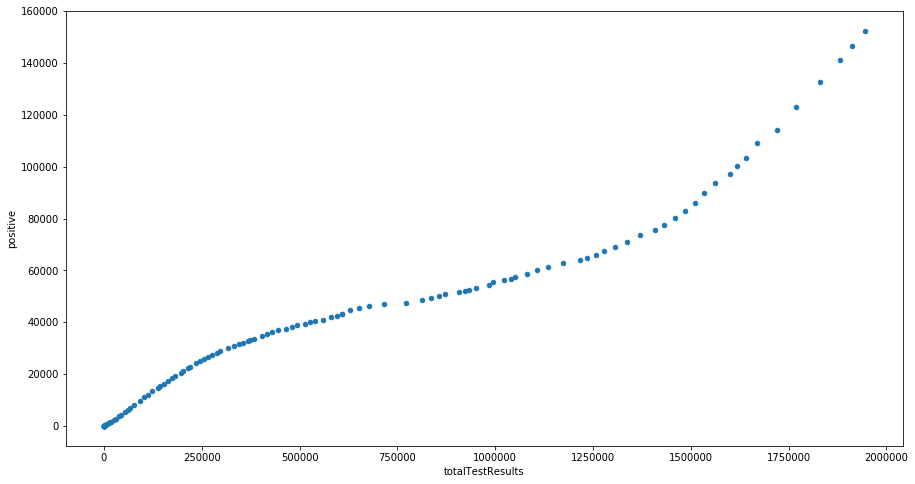

In [17]:
df_covid19_FL.plot(x='totalTestResults',y='positive',kind='scatter',figsize=(15,8))